In [1]:
import pandas as pd  
import numpy as np  
import csv 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv', sep=',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Generating the shape of our original dataframe in terms of Rows and Columns

In [3]:
print(("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1])))

There are 10866 rows and 21 columns in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


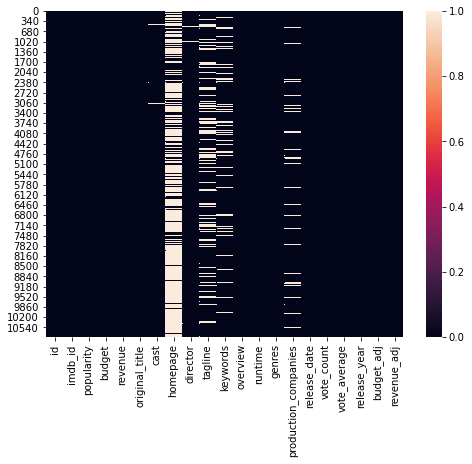

imdb_id's null rate :0.09%
cast's null rate :0.7%
homepage's null rate :72.98%
director's null rate :0.4%
tagline's null rate :25.99%
keywords's null rate :13.74%
overview's null rate :0.04%
genres's null rate :0.21%
production_companies's null rate :9.48%


In [6]:
plt.figure(figsize=(8,6))

sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

# Observation


homepage' has a 73% null rate clearly seen on the map. 'imdb_id', 'cast', 'director','overview' and 'genre' have very few missing values.

In [8]:
df_budget_count =  df.groupby('budget').count()['id']
df_budget_count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

# counting zero values in each column.

In [9]:
df_revenue_count =  df.groupby('revenue').count()['id']
df_revenue_count.head()

revenue
0    6016
2       2
3       3
5       2
6       2
Name: id, dtype: int64

In [10]:
df_revenue_adj_count =  df.groupby('revenue_adj').count()['id']
df_revenue_adj_count.head(2)

revenue_adj
0.000000    6016
2.370705       1
Name: id, dtype: int64

In [11]:
df_budget_adj_count =  df.groupby('budget_adj').count()['id']
df_budget_adj_count.head(2)

budget_adj
0.000000    5696
0.921091       1
Name: id, dtype: int64

In [12]:
df_runtime_count =  df.groupby('runtime').count()['id']
df_runtime_count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

# Observation

There are a lot of zero values specifically in budget ,revenue, budget_adj and revenue_adj. It is best we decide to keep the zero values.

# Data Cleaning

Dropping Columns that are not needed and set inplace=True so we keep the changes

In [13]:
df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'director', 'tagline',], axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

# Below Dataset after dropping unwanted columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


In [15]:
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


# Dropping duplicates and confirm there are none

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          5169 non-null   float64
 3   revenue         4849 non-null   float64
 4   original_title  10865 non-null  object 
 5   runtime         10834 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      5169 non-null   float64
 12  revenue_adj     4849 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.2+ MB


# replacing the zero values with the mean

In [20]:
df.fillna(df.mean(), inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  float64
 3   revenue         10865 non-null  float64
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  float64
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.2+ MB


In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,2.683275e+07,1.082720e+08,30.904039,575.644627,0.935138,12.813260,2.894088e+07,1.328386e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,1.925000e+07,4.109806e+07,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.878518e+07
50%,20662.000000,0.383831,3.073958e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.688907e+07,1.151009e+08
75%,75612.000000,0.713857,3.073958e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000,3.688907e+07,1.151009e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

# Exploratory Data Analysis

Using a histogram to visualize what the data looks like for each column.

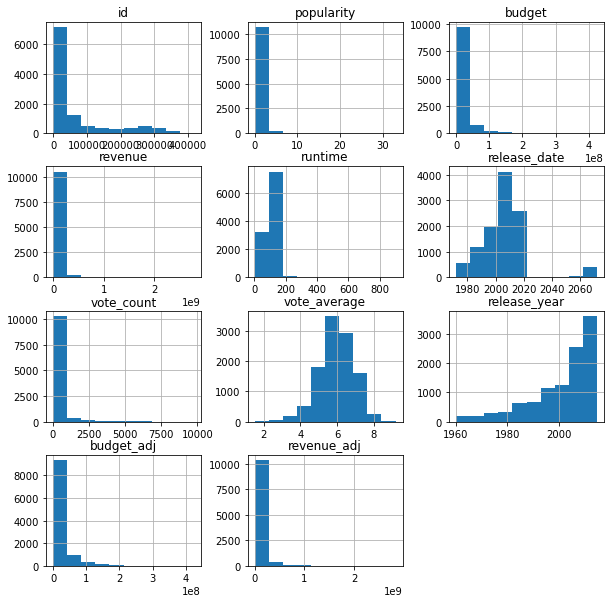

In [24]:
df.hist(figsize=(10,10));

# What are the number of movies released each year?

In [25]:
movie_released= df.groupby('release_year').count()['id']
movie_released.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

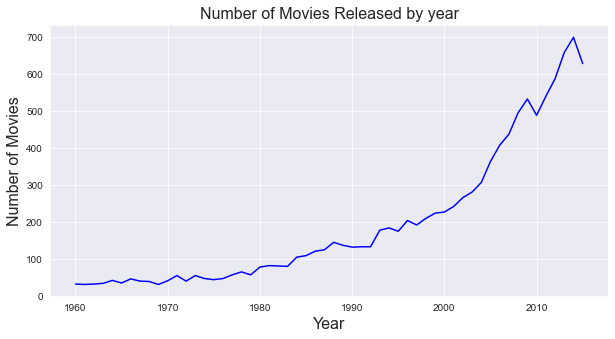

In [29]:
sns.set_style('darkgrid')
x = movie_released.index
y = movie_released
plt.figure(figsize=(10,5))
plt.plot(x, y, color='blue')
plt.title('Number of Movies Released by year', fontsize = 16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

# Observation

> We see that there are between 30 to 100 movies released each year between 1960 and 1980.
> By year 2000, we are up to 200 movies per year then a sharp increase to 700 movies 15 years later.

# The length of the movies

In [30]:
df['runtime'].mean()

102.36385453202878

In [31]:
df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

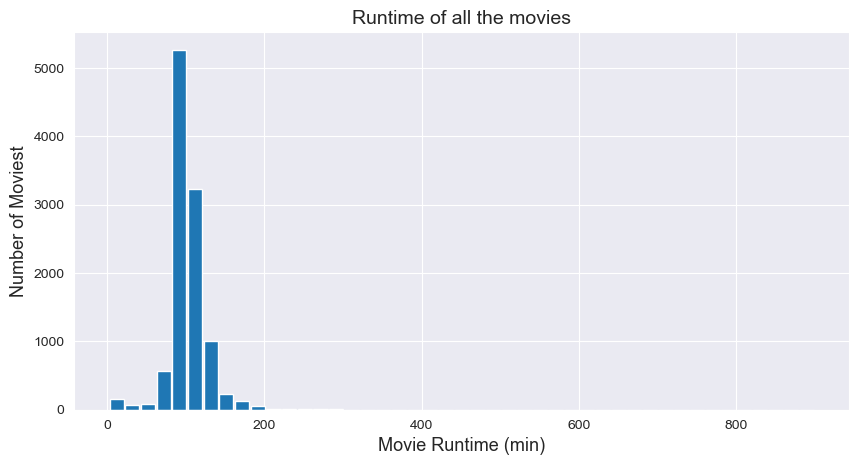

In [32]:
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Movie Runtime (min)', fontsize = 13)
plt.ylabel('Number of Moviest', fontsize=13)
plt.title('Runtime of all the movies', fontsize=14)
plt.hist(df['runtime'], rwidth = 0.9, bins =45)
plt.show()

# Observation

- The dataset's average movie runtime is 102 minutes.
- A movie lasts 900 minutes, which is too lengthy.
- 90 minutes or less are included in 20% of films. 75 percent of the films had a duration longer than 111 minutes, compared to 99 minutes for 50% of the films.


# What are the typical movie budget and earnings?

In [33]:
df['budget_adj'].mean()

36889069.20400049

In [34]:
df['budget_adj'].describe()

count    1.086500e+04
mean     3.688907e+07
std      2.894088e+07
min      9.210911e-01
25%      2.460594e+07
50%      3.688907e+07
75%      3.688907e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

# Observation

The dataset's movie budgets have an average of USD 37 Million.

In [35]:
df['revenue_adj'].mean()

115100887.62833627

In [36]:
df['revenue_adj'].describe()

count    1.086500e+04
mean     1.151009e+08
std      1.328386e+08
min      2.370705e+00
25%      5.878518e+07
50%      1.151009e+08
75%      1.151009e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

# The dataset's movie revenues on average total USD 115 Million

# What connection exists between movie budget and box office take?

In [37]:
budgets = df.groupby('release_year').mean()['budget_adj']
revenues = df.groupby('release_year').mean()['revenue_adj']

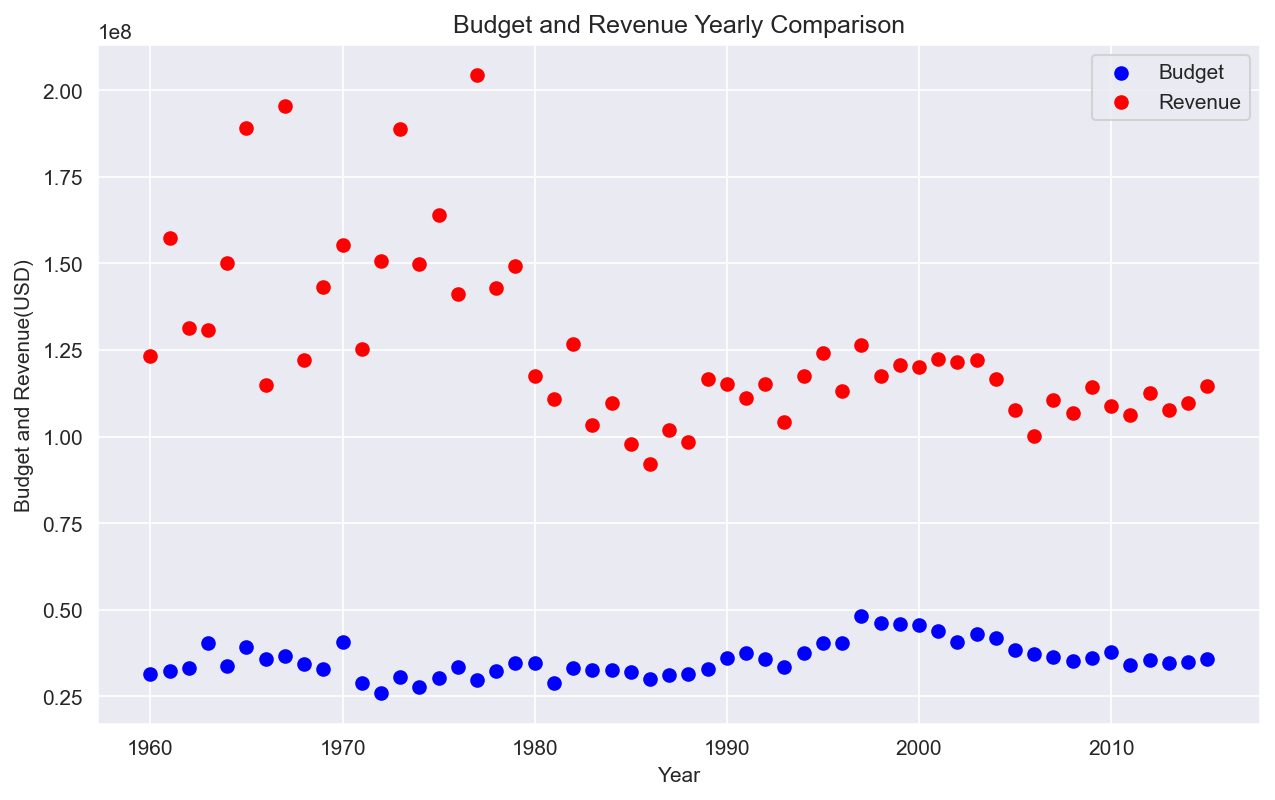

In [38]:
sns.set_style('darkgrid')
x1 = budgets.index
y1 = budgets
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(10,6), dpi = 150)
plt.scatter(x1, y1, color='blue', label = 'Budget')
plt.scatter(x2, y2, color='red', label = 'Revenue')
plt.title('Budget and Revenue Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue(USD)')
plt.legend(loc = 'upper right')
plt.show();

# How many films fall under each genre?

In [39]:
def extract_data(genres):
    data = df[genres].str.cat(sep = '|')
    data= pd.Series(data.split('|')) 
    count= data.value_counts(ascending=False)   
    return count   

In [40]:
genres = extract_data('genres')
genres.head(20)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

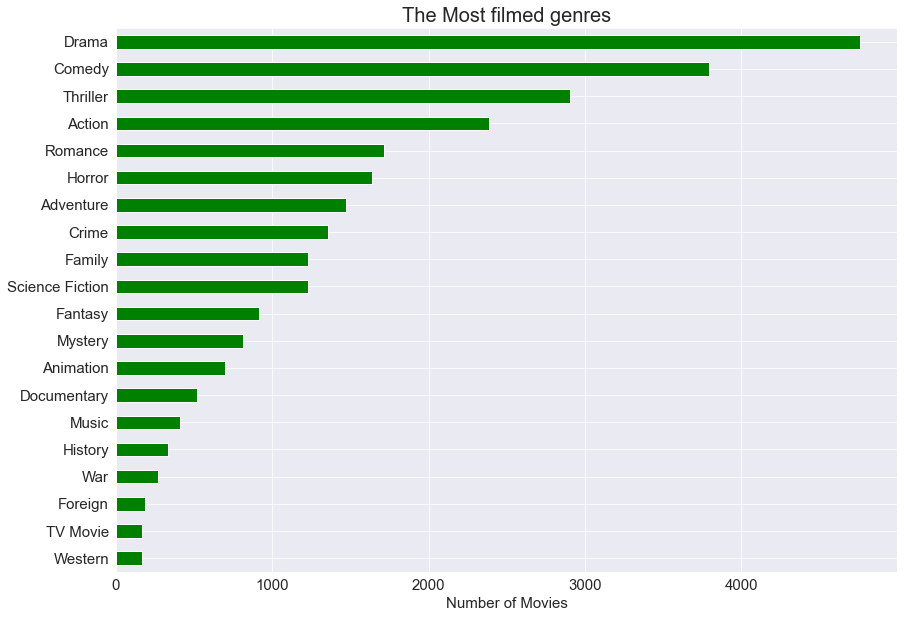

In [41]:
sns.set_style('darkgrid')
genres.sort_values(ascending = True, inplace = True)
ax = genres.plot.barh(color = 'green', fontsize = 15)
ax.set_title('The Most filmed genres',size =20)
ax.set_xlabel('Number of Movies', fontsize = 15)
ax.figure.set_size_inches(14, 10)
plt.show()

# observation 

Given that there are 4760 films in the area of drama, it must be quite popular. A close second is comedy, with 3793 works in that category. Less than 200 films fall under the categories of foreign, TV movies, and westerns.

# What is the most profitable movie?

In [42]:
df['Profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [43]:
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)
find_minmax('Profit')

Movie Which Has Highest Profit :  Star Wars
Movie Which Has Lowest Profit  :  The Warrior's Way


,1329,2244
id,11,46528
popularity,12.037933,0.25054
budget,11000000.0,425000000.0
revenue,775398007.0,11087569.0
original_title,Star Wars,The Warrior's Way
runtime,121.0,100.0
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.9,6.4


# Star Wars is the most profitable movie in the dataset.

# Conclusion

- We draw the conclusion that there has been a huge rise from the number of films released year between 1960 and 2015.

- The dataset's average movie runtime is 102 minutes. A movie lasts 900 minutes, which is too lengthy. 90 minutes or less are included in 20% of films. 75 percent of the films had a duration longer than 111 minutes, compared to 99 minutes for 50% of the films.

- The cost of a movie continues to be consistently less than its takings.

- Revenue and the budget are positively connected. Throughout the whole year, the revenue has continued to exceed the budget.

- By far, drama and comedy are the genres with the most films. The least number of films in each of the three genres included in our dataset from 1960 to 2015 are Westerns, Foreign, and TV Movies.

- The most profitable film in the dataset is Star Wars.

# Limitations

- Budget and revenue columns failed to show values in their correct currencies. Since the dataset contains a column for production country, we are aware that its values may not always be in US dollars.

- Since the actual formulas for vote average and vote count are unknown, it is recommended to utilise those numbers when completely analysing the data.

- There were too many xero values in the data set, so I made the decision to preserve them all. It was too large of a number to remove from the dataset. Mean values were used in their stead.